STEP 1
Get all the Imports.
Notice that we have put the RandomNo seed, lines right at the top, We want them to be always constant, so that we get similar results whenever we run the notebook.

In [1]:
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.set_random_seed(1)

import numpy as np
import scipy
import h5py
import os
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.python.keras.optimizers import Adam,RMSprop 

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Flatten, Dense,Conv2D, MaxPooling2D,Dropout
from tensorflow.python.keras import backend as K
 

C:\Users\ali\Anaconda3\envs\tfgpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


STEP 2
Define the Data Source. 

In [2]:
train_data_dir = 'C:/data/mnist_png/train'
validation_data_dir = 'C:/data/mnist_png/validation'

STEP 3
Initalize the Variables.
a) Size of the image ( remember its always square)
b) Number of images in Training and Validation directories.
c) EPOCHS (How many times do you want to repeat the training)
d) BATCHES: What size batch do we want to divide our Data 
e) num_classes:  how many output labels are there  

In [3]:
# dimensions of our images.
image_width, image_height = 28, 28
nb_train_samples = 60000
nb_validation_samples = 10000
epochs =1
batch_size = 256

STEP 4
This is where we pull the images from the directories.
Please note that as we get an image, we are doing multiple things here
a) we are dividing it by 255
b) we are automatically resizing the image to our required image_width and image_height
c) we are pulling only the required batch quantity of images.

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./ 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


STEP 5
Here we define the Model
this is a shallow network.


In [5]:
optimizer = RMSprop(lr=0.001,decay=1e-6)
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(image_width, image_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(10,   activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
print(model.summary())
 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,986
Trainable params: 54,986
Non-trainable params: 0
_________________________________________________________________
None


STEP 6
We run the model, training it, with the given data.
We collect a trace of its values after every run, in history.


In [6]:
with tf.device('/gpu:0'):
    history=model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples)        

model_json = model.to_json()
with open("model_catsdogs.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights('model_catsdogs.h5')
print("Saved model to disk")        

Epoch 1/1
234/234 [==============================] - 766s 3s/step - loss: 0.3352 - acc: 0.9051 - val_loss: 0.1440 - val_acc: 0.9595
Saved model to disk


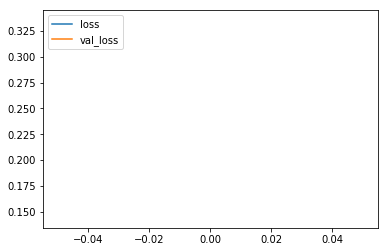

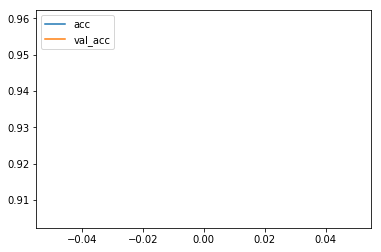

In [7]:
loss = history.history['loss']  
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'],loc='upper left')
plt.show() 

Step 7  Here we use the above model, to predict the label of new images, we give it.

C:\data\mnist_png\ProcessedUserData\1a.png
[1]


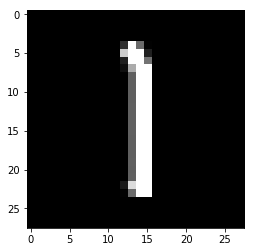

C:\data\mnist_png\ProcessedUserData\3a.bmp
[3]


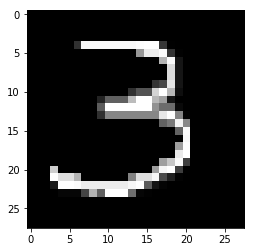

C:\data\mnist_png\ProcessedUserData\3b.bmp
[3]


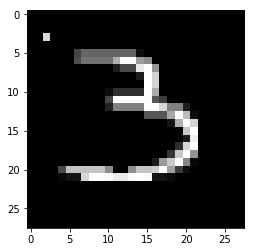

C:\data\mnist_png\ProcessedUserData\5a.bmp
[3]


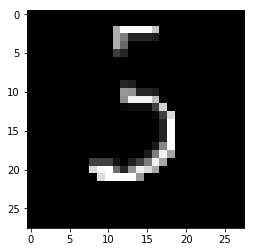

C:\data\mnist_png\ProcessedUserData\6a.bmp
[7]


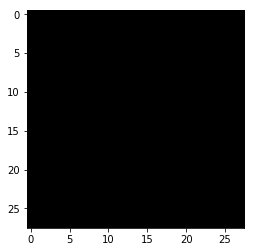

C:\data\mnist_png\ProcessedUserData\6b.bmp
[6]


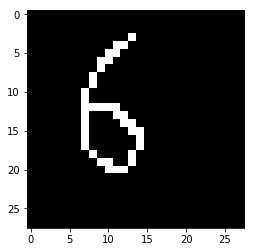

C:\data\mnist_png\ProcessedUserData\userdefined4.png
[8]


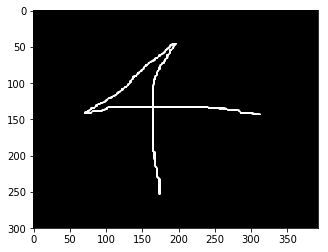

C:\data\mnist_png\ProcessedUserData\userdefineed7.png
[4]


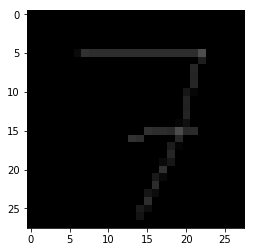

In [9]:
path = "C:\\data\\mnist_png\\ProcessedUserData\\"
files = os.listdir(path)

for file in files:
    pred=-1
    t_image= image.load_img(path + file )
    print(path + file )
    test_image = image.load_img(path + file, target_size=(image_height, image_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
 
    predictions = model.predict_classes(test_image)
    print(predictions)
    plt.imshow(t_image)
    plt.show()      

In [ ]:
def getBestShift(img):
    cy,cx = ndimage.measurements.center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty


def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

In [ ]:
import cv2
import math
from scipy import ndimage
#path = "C:\\data\\mnist_png\\UserData\\"
path = "C:\\data\\mnist_png\\train\\0\\"
processedPath ="C:\\data\\mnist_png\\ProcessedUserData\\train\\0\\" 
files = os.listdir(path)

for file in files:
    t_image= path+file
   
    if (os.path.isdir(t_image)):  
        print("Directory")
        continue
    
    gray = cv2.imread(t_image,0)
    gray = cv2.resize(255-gray, (28, 28))
    
    (thresh,gray)= cv2.threshold(gray,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    while np.sum(gray[0]) == 0:
        gray = gray[1:]

    while np.sum(gray[:,0]) == 0:
        gray = np.delete(gray,0,1)

    while np.sum(gray[-1]) == 0:
        gray = gray[:-1]

    while np.sum(gray[:,-1]) == 0:
        gray = np.delete(gray,-1,1)

    rows,cols = gray.shape
    
    if rows > cols:
        factor = 20.0/rows
        rows = 20
        cols = int(round(cols*factor))
        # first cols than rows
        gray = cv2.resize(gray, (cols,rows))
    else:
        factor = 20.0/cols
        cols = 20
        rows = int(round(rows*factor))
        # first cols than rows
        gray = cv2.resize(gray, (cols, rows))

    colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
    rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
    gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')
    shiftx,shifty = getBestShift(gray)
    shifted = shift(gray,shiftx,shifty)
    gray = shifted
     # save the processed images
    print(processedPath+file)
    cv2.imwrite(processedPath+file, gray)

### 